In [1]:
!pip install -q datasets transformers librosa jiwer accelerate
!pip install -U datasets transformers accelerate evaluate

from google.colab import drive
from huggingface_hub import notebook_login

drive.mount("/content/drive")
notebook_login()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [2]:
from datasets import load_dataset, Dataset
from itertools import islice

# 학습용 (train split)
ko_train = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ko", split="train", streaming=True), 100))
en_train = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "en", split="train", streaming=True), 100))
ja_train = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ja", split="train", streaming=True), 100))
de_train = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "de", split="train", streaming=True), 100))

train_dataset = Dataset.from_list(ko_train + en_train + ja_train + de_train)

# 검증용 (validation split - streaming 적용, 개수 제한)
ko_val = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ko", split="validation", streaming=True), 100))
en_val = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "en", split="validation", streaming=True), 100))
ja_val = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ja", split="validation", streaming=True), 100))
de_val = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "de", split="validation", streaming=True), 100))

val_dataset = Dataset.from_list(ko_val + en_val + ja_val + de_val)

# 테스트용 (test split - streaming 적용, 개수 제한)
from itertools import islice

ko_test = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ko", split="test", streaming=True), 100))
en_test = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "en", split="test", streaming=True), 100))
ja_test = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ja", split="test", streaming=True), 100))
de_test = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "de", split="test", streaming=True), 100))

test_dataset = Dataset.from_list(ko_test + en_test + ja_test + de_test)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/14.7k [00:00<?, ?B/s]

common_voice_13_0.py:   0%|          | 0.00/8.18k [00:00<?, ?B/s]

languages.py:   0%|          | 0.00/3.65k [00:00<?, ?B/s]

release_stats.py:   0%|          | 0.00/65.4k [00:00<?, ?B/s]

The repository for mozilla-foundation/common_voice_13_0 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/mozilla-foundation/common_voice_13_0.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Reading metadata...: 192it [00:00, 297.98it/s]
Reading metadata...: 1013968it [00:24, 41876.68it/s]
Reading metadata...: 7071it [00:00, 22094.97it/s]
Reading metadata...: 540437it [00:15, 34869.71it/s]
Reading metadata...: 105it [00:00, 397.11it/s]
Reading metadata...: 16372it [00:00, 43080.98it/s]
Reading metadata...: 4961it [00:00, 16812.73it/s]
Reading metadata...: 16143it [00:00, 39505.35it/s]
Reading metadata...: 131it [00:00, 273.30it/s]
Reading metadata...: 16372it [00:00, 45247.32it/s]
Reading metadata...: 4961it [00:00, 16172.44it/s]
Reading metadata...: 16143it [00:00, 42463.69it/s]


In [3]:
from transformers import WhisperProcessor, WhisperForConditionalGeneration

checkpoint = "openai/whisper-tiny"
processor = WhisperProcessor.from_pretrained(checkpoint)
model = WhisperForConditionalGeneration.from_pretrained(checkpoint)
model.config.forced_decoder_ids = None
model.config.suppress_tokens = []

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.98k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/151M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.75k [00:00<?, ?B/s]

In [4]:
def prepare_dataset(example):
    audio = example["audio"]
    example["input_features"] = processor.feature_extractor(audio["array"], sampling_rate=16000).input_features[0]
    example["labels"] = processor.tokenizer(example["sentence"]).input_ids
    return example

processed_dataset_train = train_dataset.map(prepare_dataset, remove_columns=train_dataset.column_names)
processed_dataset_val = val_dataset.map(prepare_dataset, remove_columns=val_dataset.column_names)
processed_dataset_test = test_dataset.map(prepare_dataset, remove_columns=test_dataset.column_names)


Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

In [5]:
from dataclasses import dataclass
from typing import Any, Dict, List, Union
import torch

@dataclass
class DataCollatorSpeechSeq2SeqWithPadding:
    processor: Any
    padding: Union[bool, str] = True

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        input_features = [{"input_features": f["input_features"]} for f in features]
        label_features = [{"input_ids": f["labels"]} for f in features]
        batch = self.processor.feature_extractor.pad(input_features, return_tensors="pt")
        labels_batch = self.processor.tokenizer.pad(label_features, return_tensors="pt")
        labels = labels_batch["input_ids"].masked_fill(labels_batch.attention_mask.ne(1), -100)
        batch["labels"] = labels
        return batch

data_collator = DataCollatorSpeechSeq2SeqWithPadding(processor=processor)


In [6]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/WhisperCheckpoints/run_tiny_lr1",
    per_device_train_batch_size=4,
    learning_rate=1e-5,
    num_train_epochs=3,
    logging_steps=10,
    save_strategy="epoch",
    fp16=True,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=processed_dataset_train,
    tokenizer=processor,
    data_collator=data_collator
)

<ipython-input-6-67f4b0d1633a>:14: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [7]:
trainer.train()

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.43.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Step,Training Loss
10,7.819800
20,6.199100
30,5.457700
40,4.910400
50,4.785900
60,4.593100
70,4.686800
80,4.546300
90,4.615800
100,4.307400


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:3339: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 448, 'suppress_tokens': [], 'begin_suppress_tokens': [220, 50257]}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


TrainOutput(global_step=300, training_loss=4.225832214355469, metrics={'train_runtime': 156.0131, 'train_samples_per_second': 7.692, 'train_steps_per_second': 1.923, 'total_flos': 2.9542662144e+16, 'train_loss': 4.225832214355469, 'epoch': 3.0})

In [8]:
save_path = "/content/drive/MyDrive/WhisperCheckpoints/run_tiny_lr1"
model.save_pretrained(save_path)
processor.save_pretrained(save_path)

[]

In [9]:
import torch
from jiwer import wer
from tqdm import tqdm

lang_list = ["ko", "en", "ja", "de"]
lang_wer_results = {}

for lang in lang_list:
    print(f"🌍 Language: {lang}")
    lang_data = [x for x in val_dataset if x["locale"] == lang]

    predictions, references = [], []

    for sample in tqdm(lang_data):
        input_features = processor.feature_extractor(
            sample["audio"]["array"], sampling_rate=16000, return_tensors="pt"
        ).input_features.to(model.device)

        decoder_ids = processor.get_decoder_prompt_ids(language=sample["locale"], task="transcribe")
        model.config.forced_decoder_ids = decoder_ids

        with torch.no_grad():
            predicted_ids = model.generate(input_features)

        transcription = processor.batch_decode(predicted_ids, skip_special_tokens=True)[0]
        predictions.append(transcription)
        references.append(sample["sentence"])

        print(f"🔹 Predicted: {transcription}")
        print(f"🔸 Reference: {sample['sentence']}")

    score = wer(references, predictions)
    lang_wer_results[lang] = score
    print(f"✅ {lang.upper()} WER: {score:.4f}")


🌍 Language: ko


  0%|          | 0/100 [00:00<?, ?it/s]Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
  1%|          | 1/100 [00:00<01:15,  1.31it/s]

🔹 Predicted:  This is the first time I've ever seen a lot of people in the world who are in the same position as me.
🔸 Reference: 그와 동시에 애상적이던 기분은 구름과 같이 흩어지고 안개처럼 스러졌다.


  2%|▏         | 2/100 [00:04<03:40,  2.25s/it]

🔹 Predicted: スープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープWスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンスープンス
🔸 Reference: 하면서도 기천은 동혁이가 먹는다는 바람에 숨도 아니 쉬고 쪼옥 들이켰다.


  3%|▎         | 3/100 [00:07<04:25,  2.73s/it]

🔹 Predicted: あなたは、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は
🔸 Reference: 의사에게 죽음의 선고를 받은 줄도 모르는 영신은 주사 기운에 조금 의식을 회복하였다.


  4%|▍         | 4/100 [00:10<04:45,  2.97s/it]

🔹 Predicted: Divineau de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige de laurige

  5%|▌         | 5/100 [00:14<04:54,  3.10s/it]

🔹 Predicted: 来自池炒酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酷酪酷酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酷酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪酪
🔸 Reference: 아니다 결코 아니다.


  7%|▋         | 7/100 [00:17<03:23,  2.18s/it]

🔹 Predicted: そのまま一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの
🔸 Reference: 공연한 소리 하지 말고 어서 가세.
🔹 Predicted: スープンのスープンを使っている
🔸 Reference: 선비는 받아 가지고 간난의 뒤를 따랐다.


  9%|▉         | 9/100 [00:20<02:43,  1.80s/it]

🔹 Predicted: スタートを使用すると、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままま
🔸 Reference: 새벽배송보다도 로켓배송보다도 빠른 양자 배송 서비스를 오늘부터 시작합니다.
🔹 Predicted:  Turner and I could get my two dishes from the other side.
🔸 Reference: 청하는 이쪽 노를 저으면서 소리를 지른다.


 10%|█         | 10/100 [00:24<03:27,  2.31s/it]

🔹 Predicted: auzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebeauzebe
🔸 Reference: 여러 사람의 앞으로 한 걸음 다가서며 그 검붉은 얼굴이 매우 긴장해진다.


 11%|█         | 11/100 [00:27<03:53,  2.63s/it]

🔹 Predicted: で、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その後、その
🔸 Reference: 여전히 사건 파악을 못 하고 있는데도?


 14%|█▍        | 14/100 [00:31<02:14,  1.56s/it]

🔹 Predicted: すぐに、一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つ
🔸 Reference: 즐겁고 재미있는 콘텐츠를 만들 작가를 모집합니다.
🔹 Predicted:  I should be right.
🔸 Reference: 이거리를 둘이서 걸어요.
🔹 Predicted:  [Song]
🔸 Reference: 간난이는 생긋 웃어 보이며 머리를 흔들었다.


 15%|█▌        | 15/100 [00:34<02:50,  2.01s/it]

🔹 Predicted: 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는
🔸 Reference: 무어가 무언지 분간할 수 없는 나는 이렇게 물었다.


 17%|█▋        | 17/100 [00:38<02:26,  1.76s/it]

🔹 Predicted: 一番矛盾の一番矛盾の一番矛盾の一番矛盾の一番矛盾の一番矛盾の一番矛盾の一番矛盾の一番矛盾の一番矛盾の一番矛盾の一番矛盾の一番矛盾矛盾の一番矛盾矛盾の一番矛盾矛盾の一番矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾�
🔸 Reference: 국무총리는 국회의 동의를 얻어 대통령이 임명한다.
🔹 Predicted: ペーボッチシャラルズを作る
🔸 Reference: 부르짖으며 발길로 벽을 걷어차고 일어났다.


 19%|█▉        | 19/100 [00:41<02:10,  1.61s/it]

🔹 Predicted: J.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.R.
🔸 Reference: 나오는 줄 모르고 이런 말을 하고도 가슴이 선뜩하였다.
🔹 Predicted: クラッグリスターのイメージは、
🔸 Reference: 저 뒤에 동영상으로 주암동 사건 개요가 나올 겁니다.


 20%|██        | 20/100 [00:44<02:48,  2.10s/it]

🔹 Predicted: 核心の中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に、一つの中に
🔸 Reference: 게으른 자는 말하기를 사자가 밖에 있은즉 내가 나가면 거리에서 찢기겠다 하느니라


 22%|██▏       | 22/100 [00:48<02:21,  1.81s/it]

🔹 Predicted: んーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうーうー
🔸 Reference: 그럼, 내일 오랍쇼니까?
🔹 Predicted:  And then the churrover and the churrover and the churrover.
🔸 Reference: 그는 나를 밀쳐 버린 다음에 그 음보를 들고서 읽기 시작하였습니다.


 24%|██▍       | 24/100 [00:52<02:04,  1.63s/it]

🔹 Predicted: で、一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一
🔸 Reference: 그리고 이 집에서 옥점이를 어떻게 귀여워하는 것을 잠시간이라도 알 수가 있다.
🔹 Predicted:  The transition from the transition to the transition is just a little bit more.
🔸 Reference: 아까까지 영신은 그 불을 얕은 하늘의 별들이 반짝이는 줄로만 알고있었다.


 25%|██▌       | 25/100 [00:52<01:28,  1.18s/it]

🔹 Predicted:  I'm going to give you an interesting check.
🔸 Reference: 의심하는 마음과 한꺼번에 일어나는 것은 질투였다.


 26%|██▌       | 26/100 [00:55<02:14,  1.82s/it]

🔹 Predicted:  Reckonter, die Krogezung und die Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der Krogezung der K

 28%|██▊       | 28/100 [00:55<01:14,  1.04s/it]

🔹 Predicted:  Trappertauser der Anzaten und der Anzaten.
🔸 Reference: 갑자기 튀어져 나오는 광포, 거기 연한 쾌미, 흥소


 31%|███       | 31/100 [00:59<01:07,  1.02it/s]

🔹 Predicted: あなたは、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は、私は
🔸 Reference: 뜨거운 볕이 그의 전신을 후끈하게 하였다.
🔹 Predicted:  [Siehle]
🔸 Reference: 어리석은 자로 슬기롭게 하며 젊은 자에게 지식과 근신함을 주기 위한 것이니
🔹 Predicted:  [Music]
🔸 Reference: 그 여학생인지 만지가 한참은 매우 때깔을 빼며 입술을 꼭 다문 채 김첨지를 거들떠보지도 않았다.
🔹 Predicted:  [Siekelle]
🔸 Reference: 한마디를 남기고 동혁은 구두징 소리를 뚜벅뚜벅 내며 골목 밖으로 나가 버린다.


 34%|███▍      | 34/100 [01:02<01:06,  1.01s/it]

🔹 Predicted:  Schauhrer und der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Sc

 38%|███▊      | 38/100 [01:03<00:28,  2.14it/s]

🔹 Predicted: 沖縜的手段を拡大さな彼らは、
🔸 Reference: 그들이 집까지 왔을 때는 어슬어슬한 황혼이었다.
🔹 Predicted:  [Song]
🔸 Reference: 그 기회론을 주장하는 사람은, 유명한 음악 비평가 K씨였었다.
🔹 Predicted:  [Sigh]
🔸 Reference: 무대 앞에 서면 모두가 긴장하기 마련이야.


 41%|████      | 41/100 [01:06<00:40,  1.45it/s]

🔹 Predicted: 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는 그는
🔸 Reference: 따라서 물 먹고 싶은 생각이 버쩍 들었다.
🔹 Predicted:  [Sigh]
🔸 Reference: 삼십 년이라는 세월이 흘렀습니다.
🔹 Predicted:  [Sigh]
🔸 Reference: 내일이나 모레나 그 어느 즐거운 날에


 44%|████▍     | 44/100 [01:10<00:44,  1.24it/s]

🔹 Predicted: 沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾
🔸 Reference: 저녁이 되며 아침이 되니 이는 네째 날이니라
🔹 Predicted:  [Sigh]
🔸 Reference: 밝은 달은 우리 가슴 일편단심일세
🔹 Predicted:  [cough]
🔸 Reference: 네가 나빠


 46%|████▌     | 46/100 [01:10<00:30,  1.79it/s]

🔹 Predicted:  [Spanish]
🔸 Reference: 간난이는 여공이 들어가던 말까지 하려다가 이런 말은 좀더 기다려서 해주리라 하였다.
🔹 Predicted:  [Sounds of the song]
🔸 Reference: 만일 제가 그대로 단결에 휙 뿌리치고 가보게.


 47%|████▋     | 47/100 [01:10<00:25,  2.09it/s]

🔹 Predicted:  Gauzee und Gauzee in der Schweiz.
🔸 Reference: 감독이 이렇게 와꾸를 돌리게 되면 으레 이십 전 벌금을 물게 되는 것이다.


 50%|█████     | 50/100 [01:14<00:36,  1.39it/s]

🔹 Predicted:  Erichweiterung der Anwaltungssysteme der Anwaltungssysteme der Anwaltungssysteme der Anwaltungssysteme der Anwaltungssysteme der Anwaltungssysteme der Anwaltungssysteme der Anwaltungssysteme der Anwaltungssysteme der Anwaltungssysteme der Anwaltungssysteme der Anwaltungssysteme der Anwaltungssysteme der Anwaltungssysteme der Anwaltungssysteme der Anwaltungssysteme der Anwaltungssysteme der Anwaltungssysteme der Anwaltungssysteme der Anwaltungssysteme der Anwaltungssysteme der Anwaltungssysteme der Anwaltungssysteme der Anwaltungssysteme der Anwaltungssysteme der Anwaltungssysteme der Anwaltungssysteme der Anwaltungssysteme der Anwaltungssysteme der Anwaltungssysteme der Anwaltungssysteme der Anwaltungssysteme der Anwaltungssysteme der Anwaltungssysteme der Anwaltungssysteme der Anwaltungssysteme der Anwaltungssysteme der Anwaltungssysteme der Anwaltungssysteme der Anwaltungssysteme der Anwaltungssysteme der Anwaltungssysteme der Anwaltungssysteme der Anwaltungssysteme der

 51%|█████     | 51/100 [01:17<01:03,  1.29s/it]

🔹 Predicted:  Versus与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与与��������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������
🔸 Reference: 영신은 가슴속으로부터 치밀어 오는 울음을 참느라고 잇자국이 나도록 손가락을 깨문다.


 52%|█████▏    | 52/100 [01:20<01:25,  1.78s/it]

🔹 Predicted:  Blitzztener und Schroger-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall-Fall
🔸 Reference: 따라서 인력거에 앉아 서울의 번잡한 도시를 향하여 달려오던 선비를 눈앞에 그려 보았다.
🔹 Predicted:  [Music]
🔸 Reference: 그저 들어온 복도 박차 던져 내지 못해서 애쓰는 것이 아니고 무엇이냐.


 54%|█████▍    | 54/100 [01:24<01:20,  1.75s/it]

🔹 Predicted:  In the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of

 58%|█████▊    | 58/100 [01:24<00:32,  1.28it/s]

🔹 Predicted:  Schauhrer hat sich die Schauhrer einiges an.
🔸 Reference: 병자의 몸은 벌써 싸늘하게 식었으며 얼굴이 파랗게 되었다.
🔹 Predicted:  [Sigh]
🔸 Reference: 그러고 알 수 없는 괴로운 경우에서 저를 끌어내어 주셔요.
🔹 Predicted: 浓郡府
🔸 Reference: 지금 바로 입금 가능해?


 60%|██████    | 60/100 [01:24<00:22,  1.82it/s]

🔹 Predicted:  I'm going to be a little bit more focused on the first thing I did.
🔸 Reference: 이리하여 주화조로서 탄주는 끝이 났습니다.
🔹 Predicted:  Eriches schlubelt das Schroßtel.
🔸 Reference: 그는 오던 길을 다시 종로로 향해 갔다.


 61%|██████    | 61/100 [01:24<00:17,  2.22it/s]

🔹 Predicted: 그 was an example in the first half of the year.
🔸 Reference: 선비는 감독이 그를 부를 터이지 하고 하루 종일 가슴이 두근거렸다.


 62%|██████▏   | 62/100 [01:28<00:45,  1.19s/it]

🔹 Predicted:  Ich bin der Mannschaftsatz, und ich bin der Mannschaftsatz, und ich bin der Mannschaftsatz, und ich bin der Mannschaftsatz, und ich bin der Mannschaftsatz, und ich bin der Mannschaftsatz, und ich bin der Mannschaftsatz, und ich bin der Mannschaftsatz, und ich bin der Mannschaftsatz, und ich bin der Mannschaftsatz, und ich bin der Mannschaftsatz, und ich bin der Mannschaftsatz, und ich bin der Mannschaftsatz, und ich bin der Mannschaftsatz, und ich bin der Mannschaftsatz, und ich bin der Mannschaftsatz, und ich bin der Mannschaftsatz, und ich bin der Mannschaftsatz, und ich bin der Mannschaftsatz, und ich bin der Mannschaftsatz, und ich bin der Mannschaftsatz, und ich bin der Mannschaftsatz, und ich bin der Mannschaftsatz, und ich bin der Mannschaftsatz, und ich bin der Mannschaftsatz, und ich bin der Mannschaftsatz, und ich bin der Mannschaftsatz, und ich bin der Mannschaftsatz, und ich bin der Mannschaftsatz, und ich bin der Mannschaftsatz, und ich bin der Mannschaftsatz

 63%|██████▎   | 63/100 [01:31<01:05,  1.77s/it]

🔹 Predicted:  In the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past, in the past

 65%|██████▌   | 65/100 [01:35<01:01,  1.74s/it]

🔹 Predicted: 一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの
🔸 Reference: 먼저 말씀하여 둘 것은 섭섭히 생각하시지 말으십시오.


 67%|██████▋   | 67/100 [01:35<00:35,  1.08s/it]

🔹 Predicted:  I want to be the first person who is in the world to be the first person who is in the world to be the first person.
🔸 Reference: 무기명으로 투표를 하는 데도 대필로 쓴 사람이 많았다.
🔹 Predicted: 矛盾の矛盾について、
🔸 Reference: 대답을 듣고야 가겠다는 듯이 말똥말똥 쳐다본다.


 68%|██████▊   | 68/100 [01:38<00:53,  1.69s/it]

🔹 Predicted: 一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの
🔸 Reference: 배고픈데 지금 저녁 식사를 먹으면 너무 이를까?


 71%|███████   | 71/100 [01:39<00:22,  1.27it/s]

🔹 Predicted:  Then, slowly, slowly, slowly, slowly, slowly, slowly, slowly, slowly, slowly, slowly, slowly, slowly, slowly, slowly, slowly, slowly, slowly, slowly, slowly, slowly, slowly, slowly, slowly, slowly,
🔸 Reference: 그는 기침을 안 하려고 입을 꼭 다문 후에 숨을 쉬지 않았다.
🔹 Predicted:  [Song]
🔸 Reference: 동혁은 입술을 꽉 깨물고 원재의 뒤를 따라 묵묵히 논틀 밭틀을 걸었다.
🔹 Predicted:  Susan, Susan, Susan, Susan.
🔸 Reference: 대한 사람 대한으로 길이 보전하세
🔹 Predicted:  [Spanish]
🔸 Reference: 여러 해 별러 오던 농우회의 회관을 지으려고 오늘 저녁에 그 지경을 닦는 것이다.


 75%|███████▌  | 75/100 [01:40<00:09,  2.60it/s]

🔹 Predicted:  Versuchereauzee und die Verstande der Verstande der Verstande der Verstande der Verstande.
🔸 Reference: 이웃에게 아첨하는 것은 그의 발 앞에 그물을 치는 것이니라
🔹 Predicted:  [Spanish]
🔸 Reference: 하더니 미리부터 허리를 구부리며 집 속으로 기어들어간다.
🔹 Predicted:  [Sigh]
🔸 Reference: 그와 동시에 기천의 가슴도 쿵 하고 울렸다.


 77%|███████▋  | 77/100 [01:43<00:18,  1.26it/s]

🔹 Predicted:  Versus an die Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Versus des Vers

 78%|███████▊  | 78/100 [01:43<00:14,  1.55it/s]

🔹 Predicted:  danner die Kaukei und die Kaukei zu einem anderen Tag.
🔸 Reference: 그는 그와 한 학급에 있는 인호였다.


 79%|███████▉  | 79/100 [01:47<00:28,  1.34s/it]

🔹 Predicted:  Schauhrer und der Schauhrer hat sich die Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhrer der Schauhr

 81%|████████  | 81/100 [01:50<00:26,  1.39s/it]

🔹 Predicted: さらに、彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼
🔸 Reference: 제가 지금 좀 너무 급해서요.
🔹 Predicted:  I'm not going to be a little bit too much.
🔸 Reference: 유명한 광염 소나타의 작가 말씀이지요?"


 83%|████████▎ | 83/100 [01:50<00:13,  1.27it/s]

🔹 Predicted:  Schauhrer und Schauhrer und Schauhrer und Schauhrer und Schauhrer
🔸 Reference: 쥐어 터져서 병원비 내는 건 못 참는다
🔹 Predicted:  Antones in the same way.
🔸 Reference: 여호와 하나님이 에덴동산에서 그 사람을 내어 보내어


 85%|████████▌ | 85/100 [01:51<00:07,  2.12it/s]

🔹 Predicted:  [Siekelle]
🔸 Reference: 정은배 씨와 마동혁 씨의 음악을 굉장히 다르다고 생각했거든요.
🔹 Predicted: 彩虐的大阪约定会出现一段落ち、
🔸 Reference: 그때에 비단을 찢는 듯한 옥점의 조소가 들리는 듯하여 그는 얼핏 머리를 숙였다.


 86%|████████▌ | 86/100 [01:51<00:05,  2.65it/s]

🔹 Predicted: The first time I saw the incident was a little bit too much.
🔸 Reference: 웬일인지 선비가 울면 할멈은 번번이 따라 울곤 하였던 것이다.


 88%|████████▊ | 88/100 [01:54<00:11,  1.08it/s]

🔹 Predicted:  und dann auf den anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen anderen a

 89%|████████▉ | 89/100 [01:54<00:07,  1.45it/s]

🔹 Predicted: wagging some things to do with the same thing.
🔸 Reference: 여동생이 점점 어머니를 닮았나 보다.


 90%|█████████ | 90/100 [01:58<00:14,  1.48s/it]

🔹 Predicted: 儲terの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つ
🔸 Reference: 황금정에서는 용산으로 가는 듯한 월급쟁이들이 가득 들이몰리었다.
🔹 Predicted:  [Sigh]
🔸 Reference: 이것이 이 좋은 새 옷을 준 데 대한 흥선의 인사였다.


 92%|█████████▏| 92/100 [02:01<00:12,  1.59s/it]

🔹 Predicted:  Versuchung und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes und die Faltes 

 93%|█████████▎| 93/100 [02:04<00:14,  2.02s/it]

🔹 Predicted: つぼうかときは、そのまま一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの
🔸 Reference: 자, 여기 어떤 상점이 있다 합시다.


 94%|█████████▍| 94/100 [02:08<00:14,  2.36s/it]

🔹 Predicted: 彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は
🔸 Reference: 그때 그는 경찰서에서 고문받던 생각을 하고 소름이 쭉 끼쳤다.


 96%|█████████▌| 96/100 [02:11<00:07,  1.93s/it]

🔹 Predicted: アッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドルのアッドル
🔸 Reference: 일포는 못 들은 체하고 있다가 여전히 또 우벼 내서 맡아 보곤 하였다.
🔹 Predicted:  Konradnung und Konradnung und Konradnung.
🔸 Reference: 자기의 마음을 제어하지 아니하는 자는 성읍이 무너지고 성벽이 없는 것 같으니라


 97%|█████████▋| 97/100 [02:11<00:04,  1.42s/it]

🔹 Predicted: 一切丰富汗的冠狀
🔸 Reference: 그의 가슴에는 또다시 그 실뭉치가 욱 쓸어 올라온다.


 98%|█████████▊| 98/100 [02:15<00:03,  1.98s/it]

🔹 Predicted: で、そのまま一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一
🔸 Reference: 그럴 것이다.


 99%|█████████▉| 99/100 [02:18<00:02,  2.37s/it]

🔹 Predicted:  Undenneutel des Wartens und die Verstandsverwaltens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Wartens der Warten

100%|██████████| 100/100 [02:21<00:00,  1.42s/it]

🔹 Predicted: 彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は
🔸 Reference: 빈부가 섞여 살거니와 무릇 그들을 지으신 이는 여호와시니라
✅ KO WER: 5.4171
🌍 Language: en



  1%|          | 1/100 [00:03<05:57,  3.61s/it]

🔹 Predicted: 沖縜的手段は、一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの一つの
🔸 Reference: Again, small fast craft could attack and destroy a major warship.
🔹 Predicted:  [Spanish]
🔸 Reference: Both the Collected and Selected Poems were edited by Michael Rothenberg.


  4%|▍         | 4/100 [00:07<02:22,  1.49s/it]

🔹 Predicted: 今夜市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市
🔸 Reference: The residents moved to higher ground east of the original site.
🔹 Predicted:  La la la la la la la la la la la la
🔸 Reference: We need an end of all such matter.
🔹 Predicted:  [Sigh]
🔸 Reference: Bridget was born and raised in Ghana.


  7%|▋         | 7/100 [00:07<00:59,  1.56it/s]

🔹 Predicted:  At the worst was to die Schnappel des Schnappel des Schnappel des Bersdorfens.
🔸 Reference: The crash is the deadliest aviation disaster in both Basque Country and Iberia history.
🔹 Predicted:  Repassage der Verkrieg.
🔸 Reference: The pitched roof is clad in red tiles.
🔹 Predicted:  [Music]
🔸 Reference: Ski Gap Road leads southeast down the valley of South Poplar Run to Claysburg.


 10%|█         | 10/100 [00:07<00:30,  2.91it/s]

🔹 Predicted:  [Sigh]
🔸 Reference: Egyptian archeology is one of the branches of Egyptology.
🔹 Predicted:  I'm going to use the same method as the first one.
🔸 Reference: It is also known as Bayo Canyon Road.


 12%|█▏        | 12/100 [00:08<00:21,  4.19it/s]

🔹 Predicted:  [Sigh]
🔸 Reference: Other similar explanations include "shoally river", and "a rock ledge across a stream".
🔹 Predicted:  [Sigh]
🔸 Reference: Both ensembles wear highland dress patterned in their respective service tartans.
🔹 Predicted:  [Clears throat]
🔸 Reference: Other frames are shaped as chess pieces and geometric shapes.


 14%|█▍        | 14/100 [00:08<00:15,  5.49it/s]

🔹 Predicted:  [Sigh]
🔸 Reference: I wanted to sleep a little longer, he thought.
🔹 Predicted:  [Music]
🔸 Reference: The people with programs are seated in a very large, elegant room.


 16%|█▌        | 16/100 [00:08<00:14,  5.93it/s]

🔹 Predicted:  Neumannie von der Faltreine und der Faltreine von der Faltreine.
🔸 Reference: A man is grilling out in his backyard.
🔹 Predicted:  [Sigh]
🔸 Reference: A large black dog is catching a Frisbee while a large brown dog follows shortly after.


 18%|█▊        | 18/100 [00:11<00:55,  1.49it/s]

🔹 Predicted:  Erichholtz hat er sich die Streckeinung von der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Sitzung der Si

 20%|██        | 20/100 [00:15<01:17,  1.03it/s]

🔹 Predicted:  Reckon, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger, Schroger

 22%|██▏       | 22/100 [00:15<00:49,  1.58it/s]

🔹 Predicted:  [Music]
🔸 Reference: Gwen commits herself to restoring her relationship with her sister.
🔹 Predicted:  [Sigh]
🔸 Reference: To which he replies: I thought she was your mother!
🔹 Predicted:  [Sounds of the song]
🔸 Reference: Later that night Jill is kidnapped by gill men.


 24%|██▍       | 24/100 [00:15<00:33,  2.25it/s]

🔹 Predicted: (Rosalian)
🔸 Reference: Empty barrels make the most noise.
🔹 Predicted:  [Sigh]
🔸 Reference: When the carpet and the curtains caught fire, it was getting warm.


 26%|██▌       | 26/100 [00:16<00:24,  3.01it/s]

🔹 Predicted:  You're not going to be a little bit too much.
🔸 Reference: Bampur, where the ancient Bampur fort is located, is nearby.


 28%|██▊       | 28/100 [00:19<00:54,  1.33it/s]

🔹 Predicted:  In the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of

 31%|███       | 31/100 [00:19<00:27,  2.54it/s]

🔹 Predicted: Milkertesauzee
🔸 Reference: I've always wanted to do this!
🔹 Predicted:  [Sigh]
🔸 Reference: Her opponent is Councilor Irwin Tieng.
🔹 Predicted:  [Siekelle]
🔸 Reference: Her work considers soil microbial ecology and the study of mycorrhizal fungi.


 33%|███▎      | 33/100 [00:20<00:19,  3.51it/s]

🔹 Predicted:  [Sigh]
🔸 Reference: He is "City Press"s chief correspondent in Mpumalanga.
🔹 Predicted:  [Siekellele]
🔸 Reference: English dismissed these claims as being false.
🔹 Predicted:  [Music]
🔸 Reference: Acquires Mase Westpac Limited, which is a member of the London Gold Fixing.


 37%|███▋      | 37/100 [00:20<00:10,  5.81it/s]

🔹 Predicted:  [Siekelle]
🔸 Reference: For decades it was recognizable by the white, ladder-like snake on the building's roof.
🔹 Predicted:  [Sigh]
🔸 Reference: A mold is the counterpart to a cast.
🔹 Predicted:  [Grunts]
🔸 Reference: He also enjoys judo.
🔹 Predicted:  You're an adult, you're an adult.
🔸 Reference: All artillery units wear the "Gun Sight" on their helmets.


 41%|████      | 41/100 [00:23<00:28,  2.05it/s]

🔹 Predicted:  Versuchtee und die Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der F

 43%|████▎     | 43/100 [00:24<00:20,  2.75it/s]

🔹 Predicted:  Now, let's see.
🔸 Reference: There is no fighting against fate
🔹 Predicted:  [Sigh]
🔸 Reference: Nothing's the matter with me.
🔹 Predicted:  [Siekelle]
🔸 Reference: Not that I was listening, but I noticed that you sounded really stressed when you were explaining the situation to him.


 45%|████▌     | 45/100 [00:24<00:15,  3.63it/s]

🔹 Predicted:  [Music]
🔸 Reference: I want it as soon as possible.


 47%|████▋     | 47/100 [00:27<00:38,  1.39it/s]

🔹 Predicted: 彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は
🔸 Reference: You can reduce the quality of the anisotropic filter to gain some performance.
🔹 Predicted:  Es ist ein paar Schiff und ein paar Schiff und ein paar Schiff.
🔸 Reference: Desiderius persuaded the nobles of his diocese to endow churches and monasteries.


 49%|████▉     | 49/100 [00:27<00:26,  1.91it/s]

🔹 Predicted:  [Music]
🔸 Reference: To that end, Talia claims to have miscarried.
🔹 Predicted:  [Music]
🔸 Reference: In musicians, the condition is called "musician's focal dystonia", or simply, "musician's dystonia".


 50%|█████     | 50/100 [00:28<00:24,  2.04it/s]

🔹 Predicted:  Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner
🔸 Reference: He said that everything has its own destiny.


 51%|█████     | 51/100 [00:31<00:52,  1.07s/it]

🔹 Predicted:  The first thing that was in the first place was the first time I saw the first time I saw the first time I saw the first time I saw the first time I saw the first time I saw the first time I saw the first time I saw the first time I saw the first time I saw the first time I saw the first time I saw the first time I saw the first time I saw the first time I saw the first time I saw the first time I saw the first time I saw the first time I saw the first time I saw the first time I saw the first time I saw the first time I saw the first time I saw the first time I saw the first time I saw the first time I saw the first time I saw the first time I saw the first time I saw the first time I saw the first time I saw the first time I saw the first time I saw the first time I saw the first time I saw the first time I saw the first time I saw the first time I saw the first time I saw the first time I saw the first time I saw the first time I saw the first time I saw the first time

 54%|█████▍    | 54/100 [00:31<00:25,  1.78it/s]

🔹 Predicted:  Das ist ein bisschen schlubesauze und ein bisschen schlubesauze.
🔸 Reference: He later went on to score two more centuries against the South Africans.
🔹 Predicted:  [Music]
🔸 Reference: Plesiosauroids evolved from earlier, similar forms such as pistosaurs.
🔹 Predicted:  [Music]
🔸 Reference: However, certain reactants do not follow this simple pattern.
🔹 Predicted:  [Music]
🔸 Reference: The tournament features four eight-team regions.


 58%|█████▊    | 58/100 [00:35<00:28,  1.49it/s]

🔹 Predicted:  Entenersungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungungung

 60%|██████    | 60/100 [00:35<00:19,  2.05it/s]

🔹 Predicted:  [Sigh]
🔸 Reference: The facilities are very basic.
🔹 Predicted:  Cosone in Luke's name is "Sie".
🔸 Reference: The Federal Electoral Districts elect the federal Chamber of Deputies.


 61%|██████    | 61/100 [00:36<00:17,  2.25it/s]

🔹 Predicted:  Ruhigeweiterung der Schrockung der Schrockung der Schrockung der Schrockung.
🔸 Reference: I tend to avoid speaking to customers much, mostly because of my limited German.


 62%|██████▏   | 62/100 [00:39<00:40,  1.06s/it]

🔹 Predicted:  Schauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauh

 64%|██████▍   | 64/100 [00:42<00:44,  1.22s/it]

🔹 Predicted:  Schauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauh

 66%|██████▌   | 66/100 [00:43<00:25,  1.34it/s]

🔹 Predicted: [音楽]
🔸 Reference: Dorothy was almost ready to cry with disappointment.
🔹 Predicted:  [Music]
🔸 Reference: What guidelines will help in building cheaper, affordable houses?
🔹 Predicted:  [Sigh]
🔸 Reference: ‘Nearly there!’ the Queen repeated.


 70%|███████   | 70/100 [00:43<00:10,  2.79it/s]

🔹 Predicted:  [Clears throat]
🔸 Reference: A couple look at some artwork
🔹 Predicted:  [Spanish]
🔸 Reference: Philip was standing on the levee watching the waves roll off the rocks and the splashes of spume.
🔹 Predicted:  [Spanish]
🔸 Reference: A shirtless man wearing bracelets and a garland carrying a pole


 73%|███████▎  | 73/100 [00:45<00:12,  2.23it/s]

🔹 Predicted:  [S The first time I was born in the New York City, I was born in the New York City, and I was born in the New York City, and I was born in the New York City, and I was born in the New York City, and I was born in the New York City, and I was born in the New York City, and I was born in the New York City, and I was born in the New York City, and I was born in the New York City, and I was born in the New York City, and I was born in the New York City, and I was born in the New York City, and I was born in the New York City, and I was born in the New York City, and I was born in the New York City, and I was born in the New York City, and I was born in the New York City, and I was born in the New York City, and I was born in the New York City, and I was born in the New York City, and I was born in the New York City, and I was born in the New York City, and I was born in the New York City.
🔸 Reference: The spot on the blotter was made by green ink.
🔹 Predicted:  [Sigh]
🔸 Refer

 75%|███████▌  | 75/100 [00:45<00:08,  3.11it/s]

🔹 Predicted:  [Sigh]
🔸 Reference: Two ladies play the violin and the guitar on the street to entertain the passer byes.
🔹 Predicted:  [Sigh]
🔸 Reference: A young darkskinned boy in a large shirt sitting next to a large pile of sandals.


 76%|███████▌  | 76/100 [00:48<00:21,  1.09it/s]

🔹 Predicted:  Verschallel und auf die Streckein der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine der Faltbeine 

 77%|███████▋  | 77/100 [00:52<00:33,  1.45s/it]

🔹 Predicted:  Schummer zu schenzen und schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu schenzen zu s

 79%|███████▉  | 79/100 [00:55<00:30,  1.46s/it]

🔹 Predicted:  Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Sc

 81%|████████  | 81/100 [00:55<00:16,  1.13it/s]

🔹 Predicted:  [Sigh]
🔸 Reference: While you're still champion!
🔹 Predicted:  [Siekelle]
🔸 Reference: If you just read the code, you'll miss out on why I made certain decisions.
🔹 Predicted:  [Song]
🔸 Reference: Firefox is probably the easiest to get started with, although I prefer Chrome.


 85%|████████▌ | 85/100 [00:56<00:06,  2.40it/s]

🔹 Predicted:  Erichesieke hat er sich die Strecke an.
🔸 Reference: Thought there might be one left over.
🔹 Predicted:  (crying)
🔸 Reference: Minier asked his friend Mark Salomon to try out as vocalist.
🔹 Predicted:  [Music]
🔸 Reference: Atlantic history studies the Atlantic World in the early modern period.


 88%|████████▊ | 88/100 [00:59<00:08,  1.50it/s]

🔹 Predicted:  I'm going to have a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little

 89%|████████▉ | 89/100 [01:03<00:13,  1.21s/it]

🔹 Predicted:  In the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of

 91%|█████████ | 91/100 [01:03<00:07,  1.22it/s]

🔹 Predicted:  [S The first time I was in the hospital, I was in the hospital, and I was in the hospital.
🔸 Reference: A lady with glasses holds a baby who is looking up at her.


 92%|█████████▏| 92/100 [01:06<00:10,  1.35s/it]

🔹 Predicted:  Brasson der Bauer und der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Sch

 94%|█████████▍| 94/100 [01:10<00:08,  1.49s/it]

🔹 Predicted: 一会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会
🔸 Reference: Split the log with a quick, sharp blow.


 97%|█████████▋| 97/100 [01:13<00:03,  1.20s/it]

🔹 Predicted:  Erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum, erinnonum
🔸 Refere

100%|██████████| 100/100 [01:17<00:00,  1.29it/s]

🔹 Predicted:  In the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of


  1%|          | 1/100 [00:03<06:04,  3.68s/it]

🔹 Predicted: 沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に沖場に
🔸 Reference: 風に吹かれるように離れていった
🔹 Predicted:  [Sigh]
🔸 Reference: どうもそうらしい、そうだ、きっと


  5%|▌         | 5/100 [00:07<01:45,  1.11s/it]

🔹 Predicted:  NONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONON
🔸 Reference: 公園も団地と一緒だった、何も見つからなかった
🔹 Predicted:  [Music]
🔸 Reference: ロンドンではテームズ川の近くに住み、
🔹 Predic

  7%|▋         | 7/100 [00:07<01:02,  1.50it/s]

🔹 Predicted: (笑)
🔸 Reference: 冬でもそうめんをよく食べます
🔹 Predicted:  [Sigh]
🔸 Reference: 三重県桑名市


  9%|▉         | 9/100 [00:10<01:30,  1.01it/s]

🔹 Predicted: スッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラのスッキャラの
🔸 Reference: 筋トレの成果がでる前に腰を痛めた
🔹 Predicted: 沖場に関係に行く
🔸 Reference: 京都市南区
🔹 Predicted:  [Sigh]
🔸 Reference: モンタナ州の最大都市はビリングスである


 11%|█         | 11/100 [00:14<01:54,  1.29s/it]

🔹 Predicted: 沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾沾
🔸 Reference: 厚焼きたまごはかんたんにできる
🔹 Predicted:  [Music]
🔸 Reference: まったく衰えもしない姿に、鳥肌を覚えてしまった。


 15%|█▌        | 15/100 [00:14<00:49,  1.72it/s]

🔹 Predicted: 一切丰富汗的军事丰富汗
🔸 Reference: 徹底した清掃と丁寧な調理を心がけたことで客足が戻ってきた
🔹 Predicted:  [Sigh]
🔸 Reference: 壺の中の塩をたくさんよくもみ込んでください
🔹 Predicted:  [music]
🔸 Reference: 作られたものから作るものへとして、矛盾的自己同一に徹することによって、歴史的世界は生物の世界から人間の世界へと発展する。
🔹 Predicted:  [Sigh]
🔸 Reference: ふざけて出品したらガチで売れてビビる


 17%|█▋        | 17/100 [00:17<01:19,  1.05it/s]

🔹 Predicted: 沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖縜的水平で、沖�
🔸 Reference: 外国だと驚くほど安く買えたりします


 20%|██        | 20/100 [00:21<01:15,  1.06it/s]

🔹 Predicted: 一会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会
🔸 Reference: 好きだった映画がリメイクされた
🔹 Predicted:  [Sigh]
🔸 Reference: 公園の遊具や設備はあのころと比べて変わっていた
🔹 Predicted:  [Sigh]
🔸 Reference: 自分は、いったい幸福なのでしょうか


 22%|██▏       | 22/100 [00:21<00:50,  1.54it/s]

🔹 Predicted:  [Sigh]
🔸 Reference: そうしてその穴の中から時々ぷうぷうと煙を吹く
🔹 Predicted:  [Sigh]
🔸 Reference: 彼は、実家のお墓に埋葬された。


 24%|██▍       | 24/100 [00:21<00:35,  2.16it/s]

🔹 Predicted:  I would never be able to do this for the first time.
🔸 Reference: 木箱の向こうの大きな写真の、僕の知らない君に向けて礼をする。
🔹 Predicted:  I'm just going to do something that I can't do.
🔸 Reference: 料理酒を入れるとコクが出ておいしくなる。


 26%|██▌       | 26/100 [00:22<00:23,  3.17it/s]

🔹 Predicted:  Erichertelien hat er den Lundern.
🔸 Reference: 過去にとらわれてると動けない
🔹 Predicted:  Geschenessentelscherns
🔸 Reference: 利用者の意見も参考にするとよいでしょう
🔹 Predicted:  Das ist ein bisschen guter.
🔸 Reference: リニューアルオープンというが、ほとんど変わってなかった


 28%|██▊       | 28/100 [00:22<00:16,  4.45it/s]

🔹 Predicted:  That must give us this little rubbish.
🔸 Reference: お役に立ててうれしいです
🔹 Predicted:  There we go.
🔸 Reference: 岡山県美作市


 30%|███       | 30/100 [00:22<00:12,  5.52it/s]

🔹 Predicted:  What a rocker! Turn to the position of the series.
🔸 Reference: 見てないけど、感動をありがとうセールで安く買う
🔹 Predicted:  [Music]
🔸 Reference: 技術は生産的であり、世界を革新しまた豊富にする。


 32%|███▏      | 32/100 [00:22<00:10,  6.41it/s]

🔹 Predicted:  Some lines that can kind of, some lines that can,
🔸 Reference: 専門用語がいっぱいだけど、話してる本人もわかってない


 33%|███▎      | 33/100 [00:26<00:53,  1.26it/s]

🔹 Predicted:  Dattelbezirzein und Zirzzein und Zirzzein zu der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Zeit der Z

 37%|███▋      | 37/100 [00:26<00:24,  2.57it/s]

🔹 Predicted:  Schöner Scherbeer hat sich die Scherbeine auf der Seite.
🔸 Reference: いずれ僕もあと三十年もしたら浴衣がけで
🔹 Predicted:  [Sigh]
🔸 Reference: 僕も君の背中に向けて、じゃあねと言い返して、手を振った
🔹 Predicted:  [Song]
🔸 Reference: 注文はずいぶん多いでしょうがどうか一々こらえて下さい


 39%|███▉      | 39/100 [00:26<00:18,  3.31it/s]

🔹 Predicted:  [Music]
🔸 Reference: 掘り出した砂を砂場の真ん中に集めて、固めて、山にして、また山に砂をかける
🔹 Predicted:  I'm going to be a little bit more focused on the first thing I do.
🔸 Reference: いくら人間だって、そういつまでも栄える事もあるまい
🔹 Predicted:  [Music]
🔸 Reference: そこで僕らは遊んだ、穴を掘り、山を作り、また穴を掘った


 43%|████▎     | 43/100 [00:30<00:30,  1.85it/s]

🔹 Predicted:  Schlein und der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein der Schlein de

 45%|████▌     | 45/100 [00:30<00:21,  2.51it/s]

🔹 Predicted:  [Sigh]
🔸 Reference: 空き地を埋めていった
🔹 Predicted:  [Spanish]
🔸 Reference: しかもあとで聞くとそれは書生という人間中で一番獰悪な種族であったそうだ
🔹 Predicted: カラー
🔸 Reference: 欲しいキャラが出ない


 49%|████▉     | 49/100 [00:30<00:12,  4.22it/s]

🔹 Predicted:  [Sigh]
🔸 Reference: 大量の睡眠薬を飲んだ猫のようにじっとする
🔹 Predicted:  [Sings of the New York City]
🔸 Reference: 他のチャンネルも似たようなドラマかワイドショーが流れていた
🔹 Predicted:  [Sigh]
🔸 Reference: 滋賀県甲賀市
🔹 Predicted:  [Sigh]
🔸 Reference: まれにみる文理両方をかねた人でした


 51%|█████     | 51/100 [00:34<00:33,  1.45it/s]

🔹 Predicted: 一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与一切与
🔸 Reference: 技術的に作られたものはすべて形をもっている。
🔹 Predicted:  [Sigh]
🔸 Reference: 勝とうが負けようが点がじゃんじゃん入る試合なら満足です


 55%|█████▌    | 55/100 [00:37<00:32,  1.40it/s]

🔹 Predicted: 一会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会
🔸 Reference: 京都府精華町
🔹 Predicted:  [Sigh]
🔸 Reference: 岡山県井原市
🔹 Predicted:  [Sigh]
🔸 Reference: 岐阜県羽島市


 56%|█████▌    | 56/100 [00:41<00:51,  1.18s/it]

🔹 Predicted: 一会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会
🔸 Reference: 映像作品は個人でここまで作れる時代になったんだな
🔹 Predicted:  [Squeak]
🔸 Reference: まだ残っていたんだ、僕は指先でそっとシールに触れる


 58%|█████▊    | 58/100 [00:44<00:56,  1.35s/it]

🔹 Predicted: 一会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会儿会
🔸 Reference: エクアドルの首都はキトである


 59%|█████▉    | 59/100 [00:47<01:11,  1.73s/it]

🔹 Predicted: 沖縜的一段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段�����������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������
🔸 Reference: 異臭を放つ煙がすき間から入りこんでくる


 60%|██████    | 60/100 [00:51<01:23,  2.08s/it]

🔹 Predicted:  Verschurchspirter des Graspernens zu der Kaltes und der Kaltes und der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kaltes zu der Kalte

 61%|██████    | 61/100 [00:51<01:03,  1.64s/it]

🔹 Predicted:  So, when you're in the middle of the road, you're going to have to be a little bit more careful.
🔸 Reference: それが我々の性格とか個性とかいうものである。


 62%|██████▏   | 62/100 [00:54<01:18,  2.06s/it]

🔹 Predicted:  Hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, hmm, h

 64%|██████▍   | 64/100 [00:58<01:08,  1.91s/it]

🔹 Predicted:  I want you to have a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a littl

 66%|██████▌   | 66/100 [01:01<01:02,  1.83s/it]

🔹 Predicted:  Wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wasch wa

 67%|██████▋   | 67/100 [01:04<01:11,  2.15s/it]

🔹 Predicted:  I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm the...I'm th

 70%|███████   | 70/100 [01:08<00:44,  1.50s/it]

🔹 Predicted:  It's a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a little bit of a lit

 72%|███████▏  | 72/100 [01:08<00:27,  1.01it/s]

🔹 Predicted:  [Sigh]
🔸 Reference: リモート仕様にする必要がある
🔹 Predicted:  She was just a little bit more nervous than she was.
🔸 Reference: 作り置きして時間を節約する


 74%|███████▍  | 74/100 [01:08<00:17,  1.52it/s]

🔹 Predicted: 一切串上来的小子
🔸 Reference: デビューするやたちまち大ヒット
🔹 Predicted:  [Siehannelauzeur]
🔸 Reference: 欲求的なる身体的存在としても、我々は既にかかる自己矛盾的存在であるのである。


 75%|███████▌  | 75/100 [01:09<00:13,  1.88it/s]

🔹 Predicted: スープンのスープンを使っている
🔸 Reference: 長期的な影響はわからない


 76%|███████▌  | 76/100 [01:12<00:30,  1.25s/it]

🔹 Predicted:  Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von Schauhrschweiter von

 77%|███████▋  | 77/100 [01:12<00:22,  1.02it/s]

🔹 Predicted:  Jean-Caillien und Jean-Caillien und Jean-Caillien und Jean-Caillien
🔸 Reference: 作られたものから作るものへということは、作られたものは、種から作られたものでありながら、
🔹 Predicted:  *Siehack*
🔸 Reference: うまいけど手がギトギトになる


 79%|███████▉  | 79/100 [01:15<00:27,  1.29s/it]

🔹 Predicted:  Schauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauhrschauh

 80%|████████  | 80/100 [01:19<00:35,  1.78s/it]

🔹 Predicted:  Hushausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausa

 81%|████████  | 81/100 [01:22<00:41,  2.18s/it]

🔹 Predicted:  [Sounds of the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food" by the "Food

 83%|████████▎ | 83/100 [01:22<00:22,  1.32s/it]

🔹 Predicted:  Reversive of the same age as the same age as the same age.
🔸 Reference: 我々の個人的自己に迫るものでなければならない。
🔹 Predicted:  [Music]
🔸 Reference: 抽象論理の立場からは、矛盾するものが結合するとはいわれないであろう。


 85%|████████▌ | 85/100 [01:23<00:12,  1.16it/s]

🔹 Predicted: スープンのスープンを取り出す
🔸 Reference: ここの商店街もチェーン店が増えてきた


 86%|████████▌ | 86/100 [01:26<00:19,  1.39s/it]

🔹 Predicted: スシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシスシシスシシシシスシシシシスシシシシシシシシシシシシシシシシシシシシシシシシシシシシシシシシシシシシシシシシシシシシシシシシシシシシシシシシシシシシシシシシ
🔸 Reference: 名古屋市瑞穂区
🔹 Predicted:  [Sigh]
🔸 Reference: 岡山県赤磐市


 88%|████████▊ | 88/100 [01:29<00:18,  1.50s/it]

🔹 Predicted: さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、さぁ、
🔸 Reference: 新潟市秋葉区


 89%|████████▉ | 89/100 [01:33<00:20,  1.89s/it]

🔹 Predicted:  Herbalt an eilige Kaubeaubeaubeaubeaubeaubeaubeauaubeauaubeauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauauau
🔸 Reference: ああいう風雅なことがいまでも行なわれているのかどうかもしらず、
🔹 Predicted:  [Song]
🔸 Reference: 何でもいいから、笑わせておれば

 93%|█████████▎| 93/100 [01:36<00:08,  1.22s/it]

🔹 Predicted:  Kaltzung und Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung der Kaltzung de

 96%|█████████▌| 96/100 [01:40<00:04,  1.13s/it]

🔹 Predicted: 沙dener der Kaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukekaukek
🔸 Reference: 知り合ったときのことは忘れた
🔹 Predicted:  Oh, that was a good one.
🔸 Reference: どうも変な家だ
🔹 Predicted:  [Music]
🔸 Reference: どこか怪談じみた気味悪いものが感ぜられて来るのである


 98%|█████████▊| 98/100 [01:40<00:01,  1.32it/s]

🔹 Predicted:  [Spanish]
🔸 Reference: 不意に人間のおそろしい正体を、怒りに依って暴露する様子を見て、


100%|██████████| 100/100 [01:43<00:00,  1.04s/it]

🔹 Predicted: 彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は彼は
🔸 Reference: 人間のつましさに暗然とし、悲しい思いをしました
🔹 Predicted:  Group time is a little noisy, but this is a little noisy.
🔸 Reference: はてな何でも様子がおかしいと、のそのそ這い出して見ると非常に痛い


✅ JA WER: 31.3300
🌍 Language: de


  1%|          | 1/100 [00:00<00:11,  8.89it/s]

🔹 Predicted:  Und ich zu kurz in der Mitte.
🔸 Reference: Kanntest du das Gedicht schon?


  3%|▎         | 3/100 [00:00<00:23,  4.06it/s]

🔹 Predicted:  Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner Schöner
🔸 Reference: Hallo, möchten Sie auch zur Sprechstunde?
🔹 Predicted:  Znachem Scherzenberg und Scherzenberg.
🔸 Reference: Gott sei Dank haben wir noch ein letztes Ass im Ärmel.


  5%|▌         | 5/100 [00:00<00:14,  6.34it/s]

🔹 Predicted:  [Spanish]
🔸 Reference: Wenn zu einem Passagierflugzeug der Funkkontakt abbricht, starten routinemäßig zwei Abfangjäger.
🔹 Predicted:  [Spanish]
🔸 Reference: Sie wurde der Heeresgruppe Linsingen unterstellt.
🔹 Predicted:  [Music]
🔸 Reference: Unter anderen Habseligkeiten ist dort ein Schwein auf dem Floß zu erkennen.


  7%|▋         | 7/100 [00:01<00:14,  6.52it/s]

🔹 Predicted:  And then the first time I was born in the same time as the first time I was born in the same time.
🔸 Reference: Angrenzende Wiesen rechts der Ostrach wurden überflutet.


  8%|▊         | 8/100 [00:01<00:15,  5.83it/s]

🔹 Predicted:  Ever since the first time I was born in the same time as the first time I was born in the same time.
🔸 Reference: Dadurch konnte jedes U-Boot zum Legen von Minen eingesetzt werden.
🔹 Predicted:  [Music]
🔸 Reference: Er verdiente sich selbst als Star noch Geld als Callboy.


 10%|█         | 10/100 [00:04<01:11,  1.26it/s]

🔹 Predicted:  Anavarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha, Zubarusha,
🔸 Reference: In der mexikanischen Volksmedizin finden sich Traditionen der aztekischen Medizin.


 11%|█         | 11/100 [00:08<02:02,  1.38s/it]

🔹 Predicted:  Verschüsse im Tundereck und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes und der Faltes un

 13%|█▎        | 13/100 [00:09<01:31,  1.05s/it]

🔹 Predicted:  Schiffesauzee des Schiffesauzee des Schiffesauzee des Schiffesauzee des Schiffesauzee des Schiffesauzee des Schiffesauzee des Schiffesauzee des Schiffesauzee des Schiffesauzee des Schiffesauzee des Schiffesauzee des Schiffesauzee des Schiffesauzee des Schiffesauzee des Schiffesauzee des Schiffesauzee des Schiffesauzee des Schiffesauzee
🔸 Reference: Zwei weitere Kinder waren bereits vor Alberti verstorben.


 14%|█▍        | 14/100 [00:12<02:13,  1.55s/it]

🔹 Predicted:  Konflaschenspieler und der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Schiff der Sc

 17%|█▋        | 17/100 [00:13<01:08,  1.21it/s]

🔹 Predicted:  Schlein und schlein und schlein und schlein.
🔸 Reference: Nächstes Mal werde ich nicht bei Gundula Kircher mitfahren.
🔹 Predicted:  Verschurchteau des Verstands und die Verstands und die Verstands.
🔸 Reference: Ich lese vor, du machst im Hintergrund die Beatbox, okay?


 18%|█▊        | 18/100 [00:13<00:54,  1.50it/s]

🔹 Predicted:  Her name is also known as the "Ferry".
🔸 Reference: Warum verstehen Männer und Frauen sich einander so schlecht?


 19%|█▉        | 19/100 [00:16<01:47,  1.33s/it]

🔹 Predicted: 彼此与我同学的学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学生学
🔸 Reference: Heidenau liegt nordwestlich des Naturparks Lüneburger Heide.


 20%|██        | 20/100 [00:16<01:24,  1.06s/it]

🔹 Predicted:  Versuchung und der Versuchung der Versuchung des Versuchens des Versuchens des Versuchens des Versuchens des Versuchens des
🔸 Reference: Mit diesem Verein konnte er bereits in jungen Jahren erste nationale Erfolge feiern.


 22%|██▏       | 22/100 [00:20<01:38,  1.26s/it]

🔹 Predicted:  Scherbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbeerbebeerbebeerbebeerbebeerbebeerbebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebebe
🔸 Reference: Sie hat zwei Töchter und drei Enkelsöhne.
🔹 Predicted:  Schreit der Schrock und Sch

 23%|██▎       | 23/100 [00:23<02:22,  1.85s/it]

🔹 Predicted:  Gertritte und der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Faltreund der Fa

 26%|██▌       | 26/100 [00:24<01:00,  1.22it/s]

🔹 Predicted:  [Sieke's voice]
🔸 Reference: Hiermit wird Speicherplatz für die Schlüssel gespart.
🔹 Predicted:  The first year in the summer and the second year in the summer, the first year in the summer.
🔸 Reference: Danach war er Jugendtrainer und später Co-Trainer bei seinem Stammverein.
🔹 Predicted:  relationship.
🔸 Reference: Anschließend kehrte er zurück in die Schweiz.


 28%|██▊       | 28/100 [00:27<01:23,  1.16s/it]

🔹 Predicted: そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのまま、そのままま、そのまままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままままま
🔸 Reference: Es wird empfohlen, die ausgeschilderten Wege zu benutzen.
🔹 Predicted:  [Sigh]
🔸 Reference: Sie blüht von Juni bis August.
🔹 Predicted:  I've been to the other side of the house.
🔸 Reference: Er war der Vater der Brüder Grimm.


 31%|███       | 31/100 [00:27<00:44,  1.55it/s]

🔹 Predicted:  I think that's what I'm talking about.
🔸 Reference: Er produziert und schreibt seine Drehbücher überwiegend für Fernsehserien.


 33%|███▎      | 33/100 [00:31<01:06,  1.01it/s]

🔹 Predicted:  Schauhrer der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Föder der Fö

 35%|███▌      | 35/100 [00:31<00:39,  1.65it/s]

🔹 Predicted:  The first thing that was used was the first time I was in the hospital.
🔸 Reference: König Mattias Hunyadi wird als Herausgeber dieser Goldmünze genannt.
🔹 Predicted: 一切与的军事与的军事
🔸 Reference: Das Mühlengebäude ist ein rechteckiger Fachwerkbau mit Satteldach.
🔹 Predicted:  [Sigh]
🔸 Reference: Die Kirche ist ein rechteckiger Putzbau unter Satteldach.


 39%|███▉      | 39/100 [00:35<00:43,  1.41it/s]

🔹 Predicted:  Schauß und anscheinend auf die Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer der Siehrer

 41%|████      | 41/100 [00:35<00:28,  2.06it/s]

🔹 Predicted:  I'm just gonna be a little bit more focused on the next one.
🔸 Reference: Vier Jahre lange saß ich unschuldig im Knast.
🔹 Predicted:  Feltin der Säger und der Schleppel.
🔸 Reference: Für ein paar Schilling haben sie die Funde damals verhökert.


 42%|████▏     | 42/100 [00:35<00:24,  2.35it/s]

🔹 Predicted: 一番矛盾の一つの一つの矛盾の矛盾について、
🔸 Reference: Man sollte den Gegner gar nicht erst so ungestört in den Strafraum kommen lassen.
🔹 Predicted:  A perch was washed.
🔸 Reference: Dabei sollten wir es belassen.


 44%|████▍     | 44/100 [00:36<00:17,  3.27it/s]

🔹 Predicted:  Versuchung des Schroes und des Schroes des Schroes des Schroes.
🔸 Reference: Der Film befindet sich aktuell in der Postproduktion.


 47%|████▋     | 47/100 [00:39<00:33,  1.58it/s]

🔹 Predicted:  Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Schöter Sc

 49%|████▉     | 49/100 [00:43<00:49,  1.03it/s]

🔹 Predicted: 一番矛盾的一番矛盾的矛盾矛盾的矛盾矛盾的矛盾矛盾的矛盾矛盾矛盾的矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛
🔸 Reference: Der Innenraum wurde mit einer Holzdecke in Form eines umgekehrten Schiffsrumpfes gedeckt.
🔹 Predicted:  Zenehmannes und Zenehmannes und Zenehmannes
🔸 Reference: Vor den Sitzreihen stand ein Pult aus massiver Buche.


 51%|█████     | 51/100 [00:43<00:29,  1.65it/s]

🔹 Predicted:  [Song]
🔸 Reference: Was heißt das auf Romanes?
🔹 Predicted:  [Sigh]
🔸 Reference: Ja, das habe ich auch schon versucht, aber das bringt nichts.
🔹 Predicted:  [S Music]
🔸 Reference: An der Pastatheke wird Nachschub benötigt.


 55%|█████▌    | 55/100 [00:43<00:13,  3.40it/s]

🔹 Predicted:  Love is a lovely place.
🔸 Reference: Verschlafen rieb er sich die Augen.
🔹 Predicted: (笑)
🔸 Reference: Die Weihnachtsgeschichte beginnt mit einer Volkszählung.
🔹 Predicted: ん
🔸 Reference: Schau mal in der Legende nach.
🔹 Predicted:  [Sigh]
🔸 Reference: Kann ich auch so einen Lutscher haben?


 57%|█████▋    | 57/100 [00:43<00:09,  4.53it/s]

🔹 Predicted:  [Sigh]
🔸 Reference: Reg dich nicht auf.
🔹 Predicted:  There's no need to be a little bit more careful than the other one.
🔸 Reference: Das gelang erst dem englischen Physiker James Chadwick, als er die Experimente wiederholte.


 59%|█████▉    | 59/100 [00:44<00:08,  4.89it/s]

🔹 Predicted: アナスループのイベントを使っているので、
🔸 Reference: In den folgenden drei Abschnitten sind diese der Übersicht halber ausgespart.


 61%|██████    | 61/100 [00:47<00:26,  1.47it/s]

🔹 Predicted: 本来 das Verstand der Schöne des Schroes Verstandsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsverkehrsver

 64%|██████▍   | 64/100 [00:51<00:30,  1.19it/s]

🔹 Predicted: ん~♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪
🔸 Reference: Mal ein ganz anderes Thema.
🔹 Predicted: で、スペースクリームを使っている
🔸 Reference: Insgesamt aber ist das Verfahren ausgereift.


 65%|██████▌   | 65/100 [00:51<00:24,  1.44it/s]

🔹 Predicted:  dass es sich das Wasser für das Wasser vertreut.
🔸 Reference: Sprachenkompetenz ist ein Faktor, der einen sozialen Vorteil verschafft.


 66%|██████▌   | 66/100 [00:54<00:43,  1.29s/it]

🔹 Predicted:  Erneutenspieler und der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer 

 67%|██████▋   | 67/100 [00:57<00:59,  1.79s/it]

🔹 Predicted:  Underein der Verstande der Schrohrer und der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Schrohrer der Sch

 69%|██████▉   | 69/100 [01:01<00:50,  1.64s/it]

🔹 Predicted:  Reise und Reise und Reise der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstand der Verstan

 71%|███████   | 71/100 [01:01<00:26,  1.08it/s]

🔹 Predicted: シャラスターのアイスターのアイスターのアイスターがある
🔸 Reference: Sein Ressort wurde aufgeteilt.
🔹 Predicted:  [Sounds of the first time in the world]
🔸 Reference: Sie ist ein Schaf Mädchen mit rose Haar.


 72%|███████▏  | 72/100 [01:04<00:45,  1.62s/it]

🔹 Predicted: 沖縜的一段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段階段�����������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������
🔸 Reference: Dadurch stiegen die Villacher wieder in die Tauernliga auf.


 74%|███████▍  | 74/100 [01:08<00:40,  1.54s/it]

🔹 Predicted:  Zerbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbezschilderbez
🔸 Reference

 78%|███████▊  | 78/100 [01:12<00:22,  1.01s/it]

🔹 Predicted:  In the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of the name of

 80%|████████  | 80/100 [01:12<00:13,  1.52it/s]

🔹 Predicted:  I'm not going to be a little bit too busy.
🔸 Reference: Er wird von Alexander Grimm gesprochen.
🔹 Predicted: 来自池県的池水池水
🔸 Reference: Anschließend studierte er in Heidelberg Jura.


 82%|████████▏ | 82/100 [01:12<00:07,  2.36it/s]

🔹 Predicted: 沖縜的手段
🔸 Reference: Es werden vier Unterarten unterschieden.
🔹 Predicted:  [Music]
🔸 Reference: Seine beste Platzierung war der sechste Platz beim Großen Preis von Valencia.
🔹 Predicted:  [Music]
🔸 Reference: Eine weitere um einen Stein gewickelte Botschaft fliegt anschließend durch Baldwins Fenster.


 85%|████████▌ | 85/100 [01:12<00:04,  3.69it/s]

🔹 Predicted:  [Sigh]
🔸 Reference: Armee in die "Hagen Stellung" zurückgezogen.
🔹 Predicted:  She has a lot of fun and she is also a little bit more active.
🔸 Reference: Sie wird von einem Gemeindepastor betreut.


 86%|████████▌ | 86/100 [01:16<00:13,  1.03it/s]

🔹 Predicted:  Schauhrer Schauhrer schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauhrer Schauh

 88%|████████▊ | 88/100 [01:16<00:07,  1.52it/s]

🔹 Predicted:  Schmacken und Schmacken und Schmacken sind die Faltbeine der Faltbeine der Faltbeine.
🔸 Reference: Kossoff und Kirke verließen die Formation und gründeten die Band Free.


 89%|████████▉ | 89/100 [01:16<00:06,  1.78it/s]

🔹 Predicted:  Schroer schroer schroer schroer schroer schroer schroer schroer
🔸 Reference: Artelt war mit Marie Artelt, geborene Neumann verheiratet.
🔹 Predicted:  [Music]
🔸 Reference: Er wurde außerdem mehrfach in die Niedersachsen- und die Nordwestdeutsche Auswahl berufen.


 93%|█████████▎| 93/100 [01:17<00:02,  3.49it/s]

🔹 Predicted:  Schauhrer und der Kauhrer wird es auf der Faltbewegung der Kauhrer.
🔸 Reference: Friedrich Strobl ist verheiratet und hat zwei Kinder.
🔹 Predicted:  [Music]
🔸 Reference: In militärische Auseinandersetzungen war das Tor nie verwickelt.
🔹 Predicted:  [Sigh]
🔸 Reference: Die Nahrung besteht aus Früchten, Insekten, Krebsen, Kleinsäugern, sowie kleineren Vögeln und deren Eiern.


 95%|█████████▌| 95/100 [01:17<00:01,  4.65it/s]

🔹 Predicted:  [Sigh]
🔸 Reference: Sie ist mit Sophia Loren befreundet.
🔹 Predicted:  [Sigh]
🔸 Reference: Wir müssen uns auch stärker um die Ressourcen kümmern.


 98%|█████████▊| 98/100 [01:17<00:00,  5.83it/s]

🔹 Predicted:  Und ich habe mich auf die Bewegung auf die Bewegung auf der Kaltbewegung auf der Kaltbewegung.
🔸 Reference: Durch die veränderten Lebensbedingungen hat Kreuzberg als Unternehmensstandort an Attraktivität gewonnen.
🔹 Predicted:  [Song]
🔸 Reference: In diesem Jahr gewann Unternehmensgründer Günther Irmscher sen.
🔹 Predicted:  [Song]
🔸 Reference: Their success or failure in relation to social citizenship policies“.


 99%|█████████▉| 99/100 [01:17<00:00,  5.34it/s]

🔹 Predicted:  Scherfung ist der Kurskolle und der Kurskolle und der Kurskolle.
🔸 Reference: Zudem weist es auch eine antibakterielle und entzündungshemmende Wirkung auf.


100%|██████████| 100/100 [01:21<00:00,  1.23it/s]

🔹 Predicted:  Neutannung ist der Schroiner und der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner der Schroiner d

✅ DE WER: 4.2576



📊 WER 결과 (낮을수록 정확)
DE : 4.2576
EN : 4.6523
KO : 5.4171
JA : 31.3300


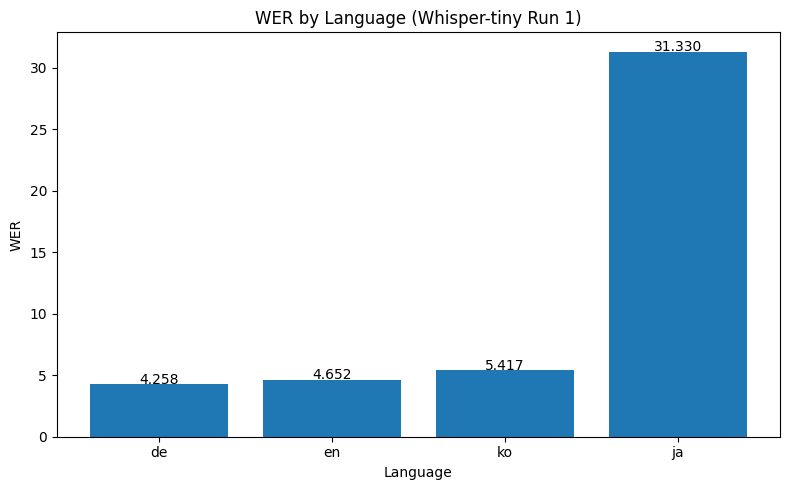

In [10]:
import matplotlib.pyplot as plt
import numpy as np

print("\n📊 WER 결과 (낮을수록 정확)")
for lang, score in sorted(lang_wer_results.items(), key=lambda x: x[1]):
    print(f"{lang.upper()} : {score:.4f}")

langs_sorted = [x[0] for x in sorted(lang_wer_results.items(), key=lambda x: x[1])]
scores_sorted = [x[1] for x in sorted(lang_wer_results.items(), key=lambda x: x[1])]

plt.figure(figsize=(8,5))
plt.bar(langs_sorted, scores_sorted)
plt.title("WER by Language (Whisper-tiny Run 1)")
plt.xlabel("Language")
plt.ylabel("WER")

for i, v in enumerate(scores_sorted):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')

plt.tight_layout()
plt.savefig("wer_tiny_run1.png")
plt.show()